In [1]:
# https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [3]:
depev = pd.read_csv('depev_final.csv')
depev.drop(depev.columns[depev.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
depev.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,ANGEV_A,CHDEV_A,CHLEV_A,HYPEV_A,PHSTAT_A,AVAIL_A,INTV_QRT,WTFA_A,WTIA_A,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,2,2,1,2,3,1,1,13177.008,7601.336,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,2,2,2,2,1,1,1,6140.552,3344.434,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,2,2,1,1,3,1,1,9191.061,6949.498,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,2,2,2,1,2,1,1,7900.035,6446.327,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,1,1,1,1,4,1,1,10875.772,8646.586,1.13


In [4]:
X = depev.drop(['DEPEV_A'], axis=1)
y = depev['DEPEV_A']

In [7]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# X[:,0] = le.fit_transform(X[:,0])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [13]:
print(cm)

[[ 366  723    0]
 [  76 5220    0]
 [   1    6    0]]


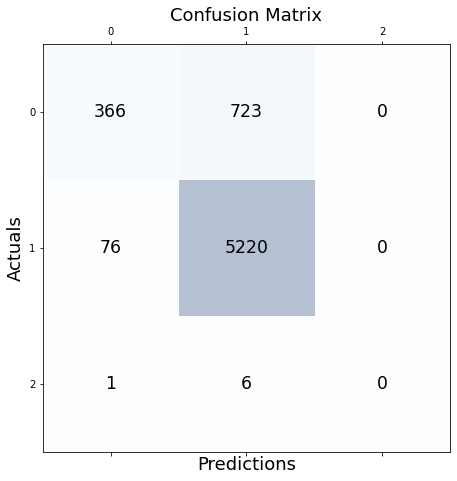

In [22]:
# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [14]:
print(ac)

0.8739048811013768
